DE Benchmark (from paper: https://www.pnas.org/doi/full/10.1073/pnas.1901979116)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
smw_file_name = '../single_mutation_walk/results.pkl'
reccombine_file_name = '../recombine_mutation/results.pkl'

with open(smw_file_name, 'rb') as f:
    smw_start_variants, smw_final_variants, smw_fitness_progressions = pickle.load(f)
with open(reccombine_file_name, 'rb') as f:
    recombine_best_variants, recombine_fitness_progressions = pickle.load(f)

In [55]:
N_BINS = 20
RANGE = [0., max([smw_fitness_progressions[i][-1] for i in range(len(smw_fitness_progressions))])]

all_counts = []
all_bins = []
all_bin_centers = []

all_sorted_fitnesses = []
all_cdf_values = []

colors = []
labels = []

def prepare_fitness(fitness_progressions):
    final_fitnesses = []
    for proression in fitness_progressions:
        final_fitnesses.append(proression[-1])

    return final_fitnesses

def prepare_hist_data(fitness_progressions):
    final_fitnesses = prepare_fitness(fitness_progressions)
    counts, bins = np.histogram(final_fitnesses, bins=N_BINS, range=RANGE)
    counts = counts / sum(counts)

    all_counts.append(counts)
    all_bins.append(bins)
    all_bin_centers.append((bins[:-1] + bins[1:]) / 2)

def prepare_cdf_data(fitness_progressions):
    final_fitnesses_sorted = np.sort(prepare_fitness(fitness_progressions))
    n = len(final_fitnesses_sorted)
    cdf_values = 1. * np.arange(n) / (n - 1)

    all_sorted_fitnesses.append(final_fitnesses_sorted)
    all_cdf_values.append(cdf_values)

def prepare_plot_data(fitness_progressions):
    prepare_hist_data(fitness_progressions)
    prepare_cdf_data(fitness_progressions)

prepare_plot_data(smw_fitness_progressions)
colors.append(('red', 1))
labels.append('DE: SMW')
prepare_plot_data(recombine_fitness_progressions)
colors.append(('blue', 0.5))
labels.append('DE: Recombine')


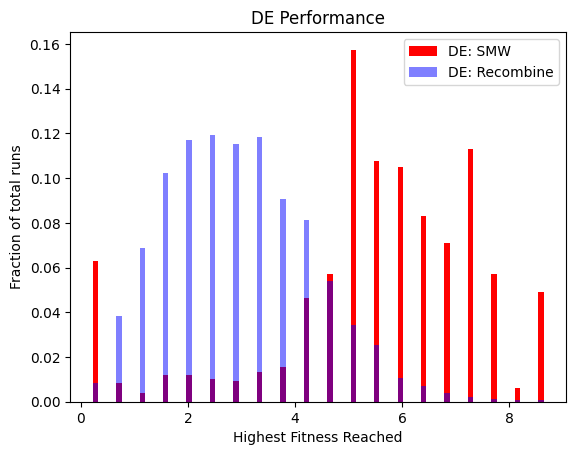

In [56]:
assert len(all_counts) == len(all_bins)
for i in range(len(all_counts)):
    #plt.stairs(all_counts[i], all_bins[i])
    plt.bar(all_bin_centers[i], all_counts[i], align='edge', width=0.1,
            color=colors[i] if len(colors) > i else None)
plt.legend(labels)
plt.xlabel('Highest Fitness Reached')
plt.ylabel('Fraction of total runs')
plt.title('DE Performance')
plt.show()

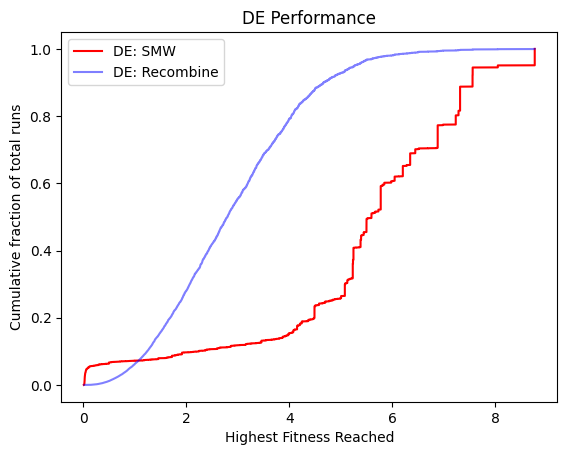

In [57]:
assert len(all_cdf_values) == len(all_sorted_fitnesses)
for i in range(len(all_cdf_values)):
    plt.plot(all_sorted_fitnesses[i], all_cdf_values[i],
            color=colors[i] if len(colors) > i else None)
plt.legend(labels)
plt.xlabel('Highest Fitness Reached')
plt.ylabel('Cumulative fraction of total runs')
plt.title('DE Performance')
plt.show()